In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget
import datetime as dt

from data_constructor import DataConstructor
from modules.data_visualizer import DataVisualizer
from modules.data_clustering import DataClustering
from modules.data_processing import DataProcessor
from modules.models import TimePeriod, PreprocessingParams, DiffParams

## Constructing data
- Fetching from database
- Filling gaps in data
- Data is fully preprocessed

In [3]:
dc = DataConstructor()

time_period = TimePeriod(dt_from=dt.datetime(2022, 1, 1), dt_to=dt.datetime(2023, 1, 1))
df, tickers = dc.construct_df(time_period, filter_stablecoins=True)

Constructing dataframe: 100%|██████████| 169/169 [04:36<00:00,  1.64s/it]


=== Log ===
=== Diff ===
=== Std normalization ===
=== Ordering tickers ===


## PCA weight analysis

In [4]:
factors, weights, variance = DataProcessor.data_process_pca(df, tickers)
variance_rounded = DataProcessor.variance_round(variance)

First 10 variance values are shown in a bar grapth

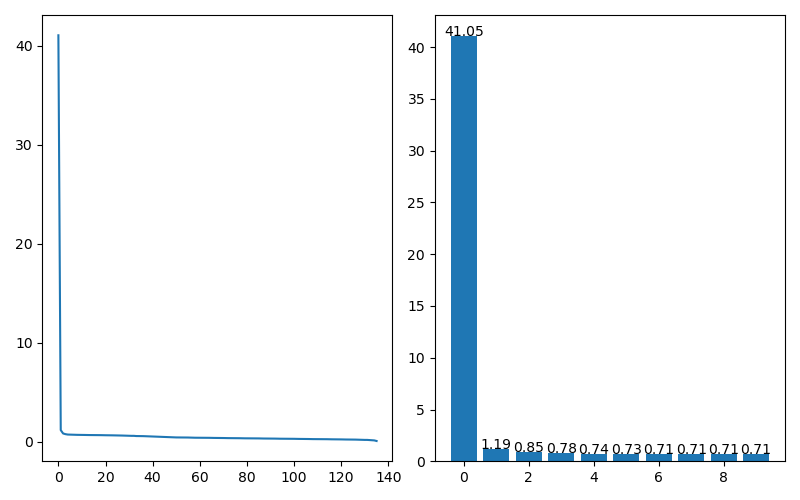

In [5]:
DataVisualizer.plot_variance(variance_rounded)

The first 3 component weight plot

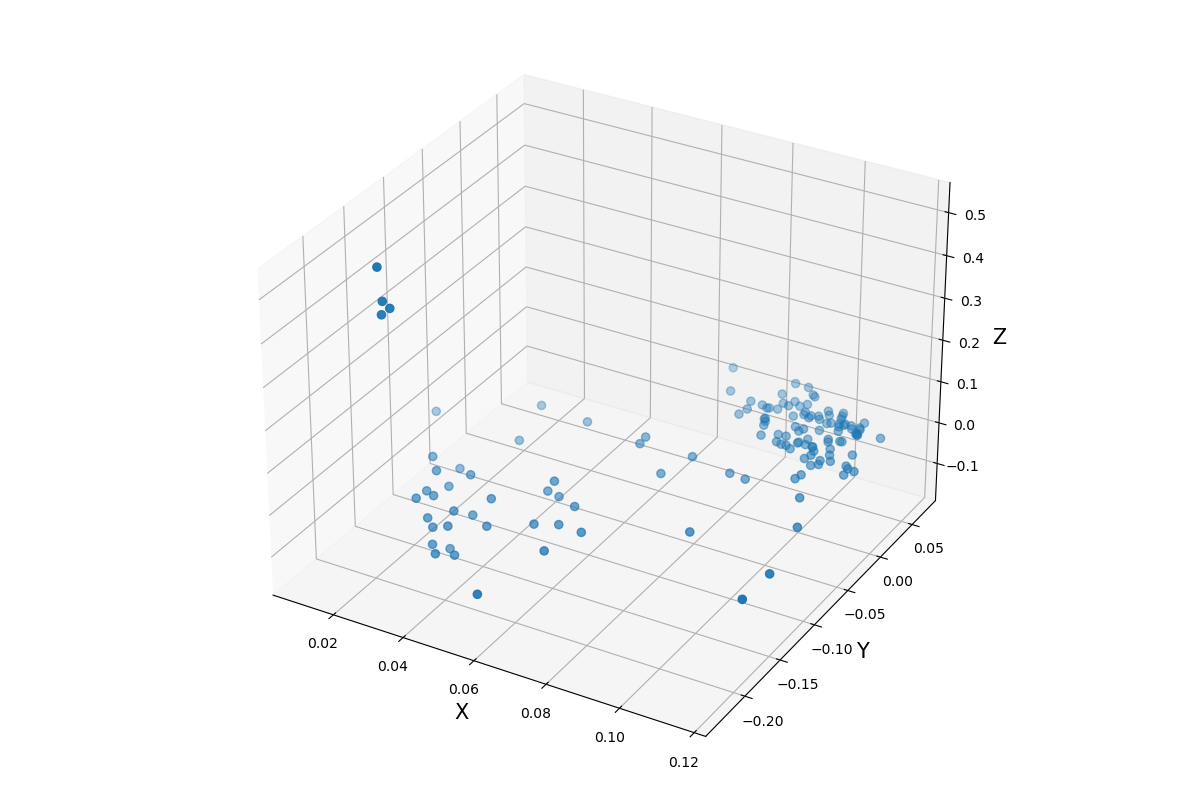

In [6]:
weight_slice = weights[:3]
DataVisualizer.plot_3d_point_cloud(weight_slice.T)

An interactive plot of the first 3 factor weights with clustered labels form DBSCAN

In [8]:
weight_slice = weights[:3]
dbscan_labels = DataClustering.cluster_dbscan(weight_slice.T, eps=0.04, min_samples=3)

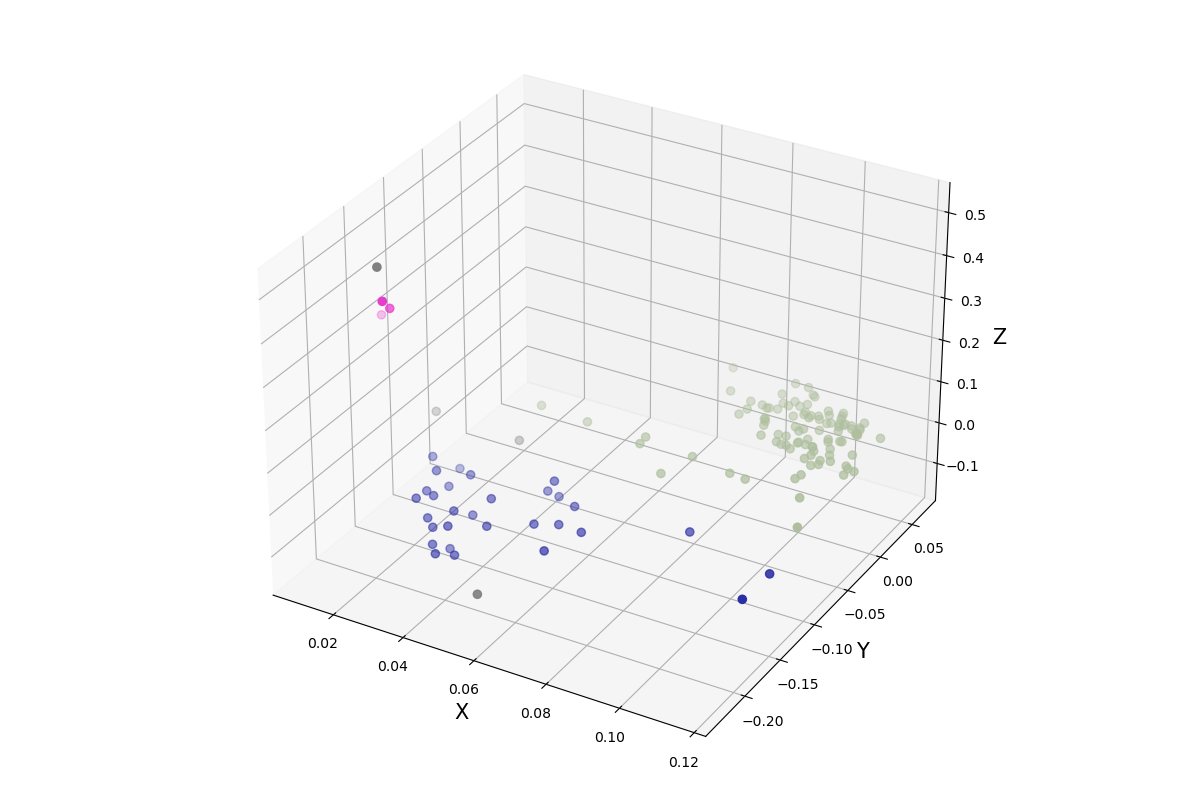

In [9]:
DataVisualizer.plot_3d_labeled_point_cloud(weight_slice.T, dbscan_labels)

Same weight plot but labels used from MeanShift clustering 

In [10]:
weight_slice = weights[:3]
meanshift_labels = DataClustering.cluster_meanshift(weight_slice.T)

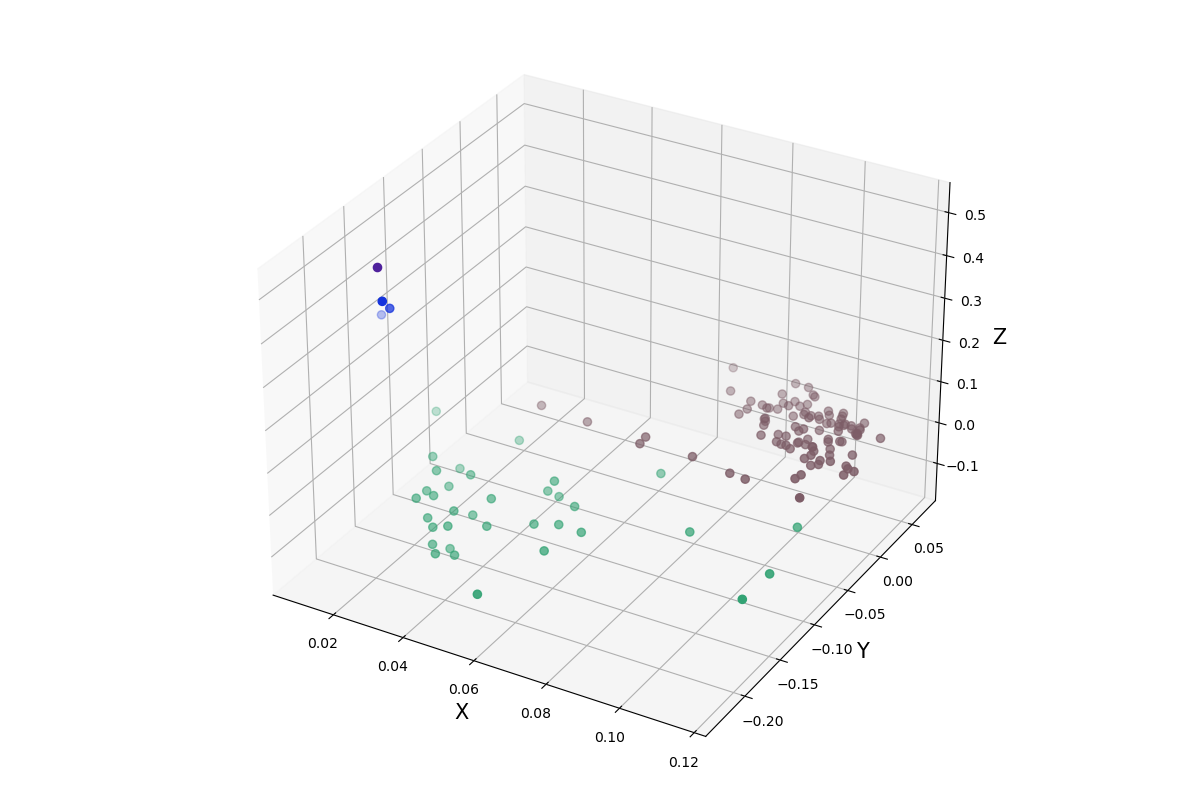

In [14]:
DataVisualizer.plot_3d_labeled_point_cloud(weight_slice.T, meanshift_labels)

## Experimenting with different preprocessing method combinations
- Fetching from database
- Filling gaps in data
- Data is preprocessed with log and std but diff is not taken

In [10]:
time_period = TimePeriod(dt_from=dt.datetime(2022, 1, 1), dt_to=dt.datetime(2023, 1, 1))

proc_params = PreprocessingParams(diff=DiffParams(is_true=False))
df_2, tickers_2 = dc.construct_df(time_period, preprocessing_params=proc_params)

Constructing dataframe: 100%|██████████| 169/169 [04:10<00:00,  1.48s/it]


=== Log ===
=== Std normalization ===
=== Ordering tickers ===


In [11]:
factors_2, weights_2, variance_2 = DataProcessor.data_process_pca(df_2, tickers_2, n_components=3)

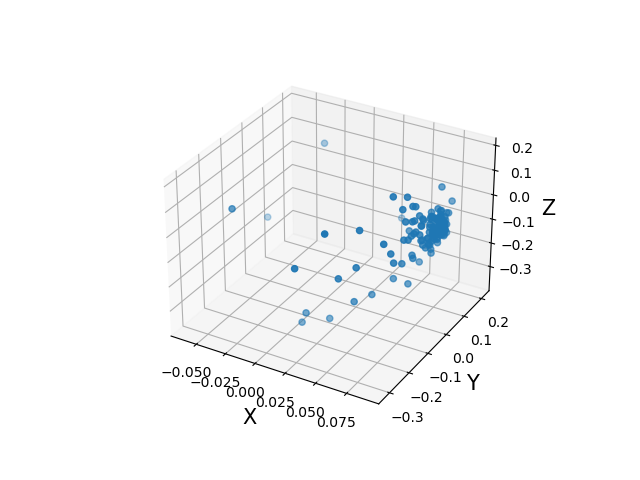

In [12]:
DataVisualizer.plot_3d_point_cloud(weights_2.T)